# Raster Surface to Community Area Aggregation

Here we will aggregate a raster surface representing average NDVI across Chicago at a 250m spatial resolution since 2014 by Community Area. All NDVI data comes from the MOD13Q1 dataset from MODIS Terra. The time-series aggregation was created from tiles released every 16 days containing the algorithmically-determined best pixels from those periods. 

## Loading the Required Packages
First we must load the packages we will need to aggregate the data

In [5]:
library(raster)
library(dplyr)
library(rgdal)

## Read in the Data
Next, we must read in the data we will be using. For this aggregation, this will be the time-aggregated NDVI data and a shapefile with the 77 Community Areas of Chicago.

In [6]:
ndvi <- raster("Average_ndvi_Overall.tif")
chi.map <- readOGR("Chicago")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/isaackamber/Desktop/AoT/MAIAC /NDVI Data/Chicago", layer: "Chicago"
with 77 features
It has 9 fields


## Examining the Data
Now that we have read the data, let's briefly examine it by plotting the Community Area boundaries on top of the ndvi raster surface.

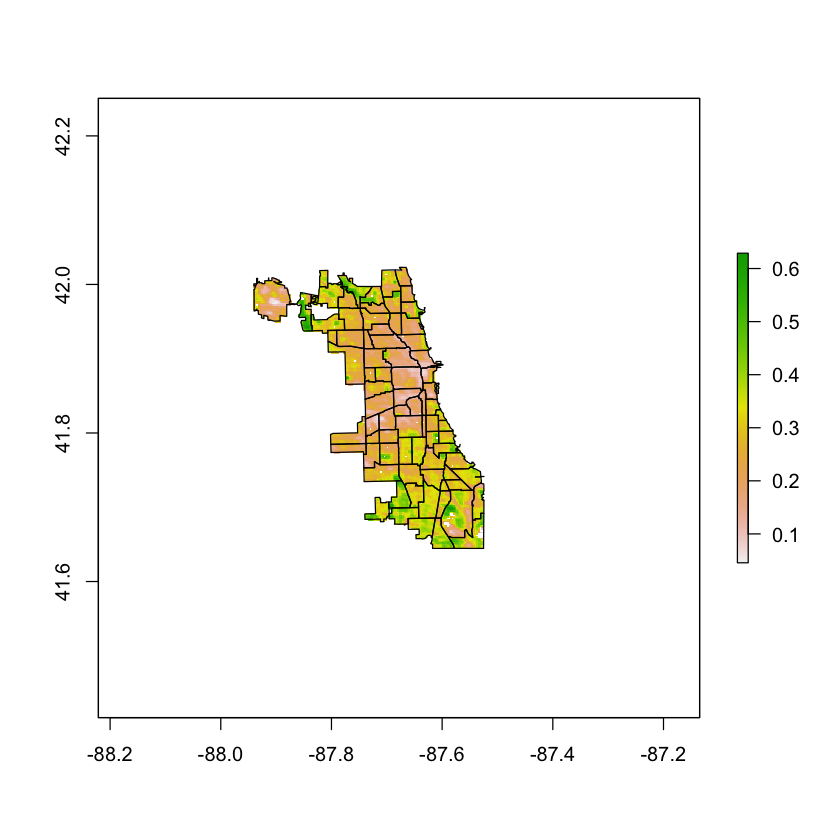

In [11]:
plot(ndvi)
plot(chi.map, add = TRUE)

## Extracting the Pixel Values from the Raster
Next, we want to extract the values of all of the pixels in each Community Area into a list. We will do this using the Raster package's "extract" function. This function extracts all raster values in a given spatial object. You can read more about the "extract" function  [here](https://www.rdocumentation.org/packages/raster/versions/2.8-19/topics/extract).

In [12]:
#Extract all values for chicago Community Areas
chi.ndvi <- raster::extract(ndvi, chi.map)

Now let's examine the product.

In [16]:
glimpse(chi.ndvi)

List of 77
 $ : num [1:87] 0.183 0.191 0.205 0.221 0.222 ...
 $ : num [1:32] 0.313 0.327 0.359 0.354 0.346 ...
 $ : num [1:33] 0.151 0.183 0.164 0.161 0.238 ...
 $ : num [1:82] 0.227 0.262 0.262 0.265 0.27 ...
 $ : num [1:51] 0.275 0.289 0.285 0.277 0.332 ...
 $ : num [1:122] 0.356 0.33 0.399 0.468 0.483 ...
 $ : num [1:74] 0.262 0.259 0.25 0.283 0.324 ...
 $ : num [1:76] 0.254 0.25 0.254 0.252 0.233 ...
 $ : num [1:101] 0.304 0.304 0.275 0.265 0.288 ...
 $ : num [1:86] 0.279 0.295 0.297 0.243 0.204 ...
 $ : num [1:111] 0.503 0.553 0.561 0.551 0.591 ...
 $ : num [1:155] 0.196 0.288 0.26 0.26 0.278 ...
 $ : num [1:126] 0.255 0.227 0.213 0.19 0.206 ...
 $ : num [1:94] 0.233 0.264 0.308 0.337 0.354 ...
 $ : num [1:196] 0.329 0.307 0.274 0.243 0.233 ...
 $ : num [1:151] 0.248 0.241 0.224 0.216 0.263 ...
 $ : num [1:184] 0.302 0.305 0.301 0.472 0.422 ...
 $ : num [1:48] 0.278 0.291 0.295 0.296 0.294 ...
 $ : num [1:181] 0.203 0.214 0.22 0.202 0.182 ...
 $ : num [1:167] 0.29 0.32 0.328 0.321

We have a list with 77 numeric vectors representing the raster pixel values for each of Chicago's 77 community areas. Let's now go about removing any NA values.

In [17]:
#Remove na values
chi.ndvi <- lapply(chi.ndvi, na.omit)

## Calculating Average Value by Community Area
Now that we have extracted all of the values, we want to calculate the mean NDVI for each Community Area

In [18]:
#Mean value by CA
ca.ndvi <- lapply(chi.ndvi, FUN=mean)
ca.ndvi <- unlist(ca.ndvi)

Let's examine the results and make sure it contains 77 values between -1 and 1 (within the acceptable range for NDVI).

In [24]:
glimpse(ca.ndvi)

 num [1:77] 0.273 0.322 0.204 0.254 0.31 ...


## Attach Mean Values to Community Area Information
Now that we have the mean values, we want to attach these numbers to Community Area information from the Chicago shapefile we have been using. For the purpose of this demonstration, we will attach the mean values to the Community Area names and numbers 

In [25]:
#Grab Community Area names/numbers from Chicago shapefile 
chi.info <- cbind(as.character(chi.map@data$community), as.integer(as.character(chi.map@data$area_numbe)))

In [26]:
head(chi.info)

DOUGLAS,35
OAKLAND,36
FULLER PARK,37
GRAND BOULEVARD,38
KENWOOD,39
LINCOLN SQUARE,4


In [52]:
#Attach NDVI numbers
ndvi.final <- cbind(chi.info, ca.ndvi)
colnames(ndvi.final) <- c("CA_Name", "CA_Number", "Mean_NDVI")

Now that we have finished, let's examine the final product.

In [53]:
head(ndvi.final)

CA_Name,CA_Number,Mean_NDVI
DOUGLAS,35,0.273240365876871
OAKLAND,36,0.322365242056549
FULLER PARK,37,0.204353500623256
GRAND BOULEVARD,38,0.25370339703996
KENWOOD,39,0.309673309326172
LINCOLN SQUARE,4,0.290377064806516


## Writing the Data
Now that we have aggregated our raster surface to the Community Area level, let's write the data to a csv.

In [54]:
write.csv(ndvi.final, "ndvi_aggregated.csv")